<a href="https://colab.research.google.com/github/shwe24/CVD_death_event-classification/blob/main/Heart_failure_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction**

## Dataset Info

The dataset contains the medical records of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure

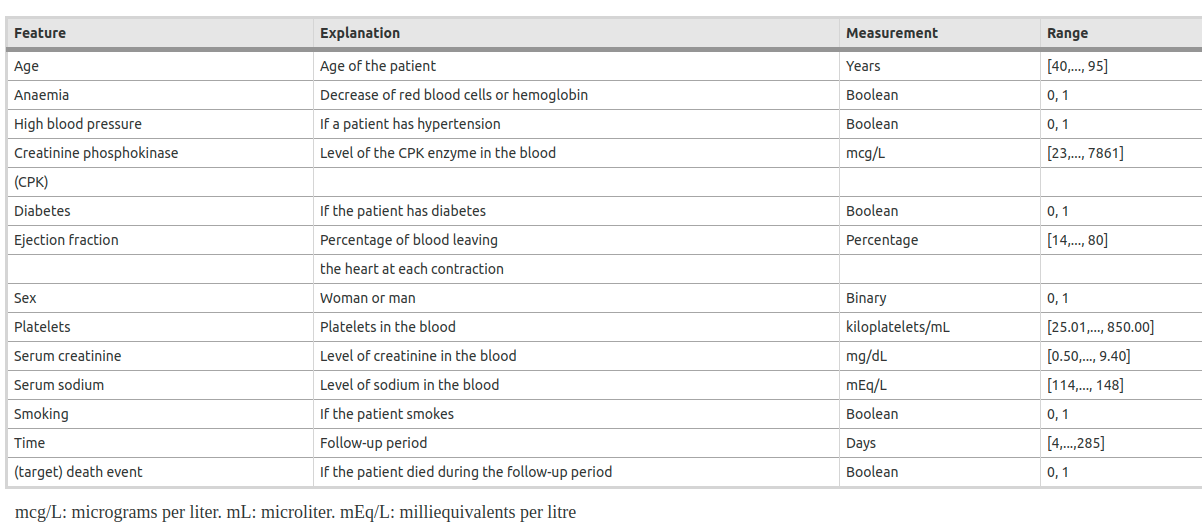

# 1. Dataset overview

In [ ]:
!pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 3.8MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
heart=pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
heart['Heart_failure']=heart['DEATH_EVENT'].replace([0,1],['Survived','Dead'])
heart['Smokes']=heart['smoking'].replace([0,1],['Non-smoker','Smoker'])
heart['Gender']=heart['sex'].replace([0,1],['Female','Male'])

In [ ]:
heart.shape

(299, 16)

In [ ]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
Heart_failure               0
Smokes                      0
Gender                      0
dtype: int64

In [ ]:
heart.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
Heart_failure                object
Smokes                       object
Gender                       object
dtype: object

In [ ]:
heart['age']=heart['age'].astype('int64')

In [ ]:
heart['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
X=heart.iloc[:,0:12]
Y=heart['DEATH_EVENT']



---



# 2. Data Imbalance

The distribution of data equally among the classes in the classification problem is one of the most important issues to be addressed to avoid misclassification due to severely skewed classes.


**SMOTE (Synthetic Minority Oversampling TEchnique)** is an oversampling method which is used to scale up the minority class in the dataset.

## Applying SMOTE algorithm to balance the class

In [ ]:
oversample = SMOTE()
x_sample_all, y_sample_all = oversample.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df = pd.DataFrame(data=x_sample_all, columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])


In [ ]:
df['DEATH_EVENT']=y_sample_all

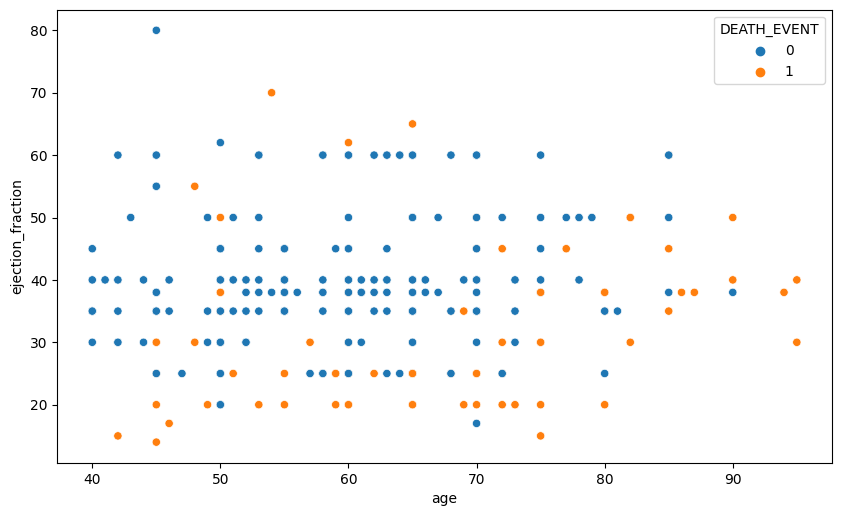

In [ ]:
import seaborn as sns
# Imblanced Data
plt.figure(figsize=(10,6),dpi=100)

sns.despine(left=True)
sns.scatterplot(x='age', y='ejection_fraction', hue = 'DEATH_EVENT', data=heart)
plt.show()



In [ ]:
from imblearn.over_sampling import ADASYN
ada=ADASYN(random_state=130)
x_sample_ada, y_sample_ada = oversample.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_ada = pd.DataFrame(data=x_sample_ada, columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
df_ada['DEATH_EVENT']=y_sample_ada

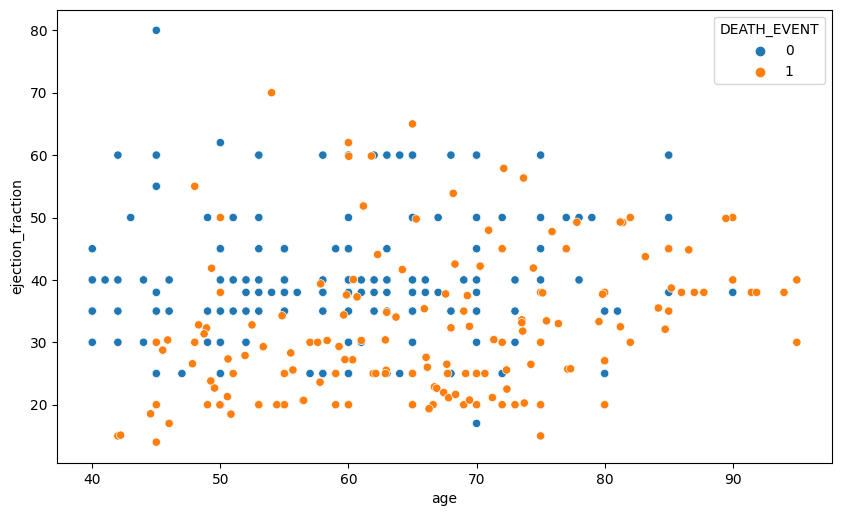

In [ ]:
plt.figure(figsize=(10,6),dpi=100)

sns.despine(left=True)
sns.scatterplot(x='age', y='ejection_fraction', hue = 'DEATH_EVENT', data=df_ada)
plt.show()

In [ ]:
x_sample_ada.shape

(406, 12)

In [ ]:
counter = Counter(y_sample_ada)
print(counter)

Counter({1: 203, 0: 203})


In [ ]:
corr=heart.corr()



---



# 3. Feature Selection mechanisms

Feature selection or variable selection is a cardinal process in the feature engineering technique which is used to reduce the number of dependent variables by picking out only those that have a paramount effect on the target attribute (survival rate in this case). The feature selection models applied herein to achieve maximum accuracy in target prediction encompasses the following:


1.   Extra Tree Classifier
2.   Pearson correlation
3.   Forward selection
4.   Chi-square
5.   Logit (Logistic Regression model)


## 3.1 Extra Tree Classifier

The Extra Tree Classifier or the Extremely Random Tree Classifier is an ensemble algorithm that seeds multiple tree models constructed randomly from the training dataset and sorts out the features that have been most voted for

In [ ]:
X=heart.iloc[:,0:12]
Y=heart['DEATH_EVENT']

[0.09785934 0.02863499 0.07288427 0.02852056 0.13577534 0.02403252
 0.06990479 0.11545268 0.08502844 0.02726124 0.02834085 0.28630497]


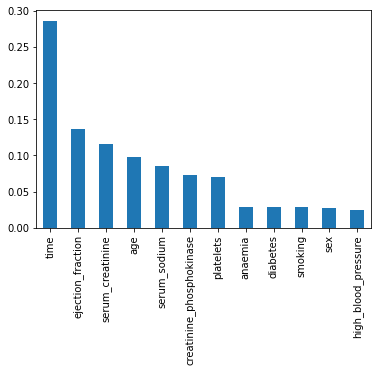

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot.bar()
plt.show()

list1=feat_importances.keys().to_list()

##3.2 Forward Selection

Forward selection is a wrapper model that evaluates the predictive power of the features jointly and returns a set of features that performs the best. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=6,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)
           
fselector = forward_feature_selector.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   16.6s finished

[2021-03-23 06:24:37] Features: 1/6 -- score: 0.6866891339869281[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   14.3s finished

[2021-03-23 06:24:51] Features

In [ ]:
fward=fselector.k_feature_names_
list2=list(fward)
list2

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'high_blood_pressure',
 'serum_creatinine',
 'smoking']

## 3.3 Chi-square Test

A chi-square test is used in statistical models to check the independence of attributes. The model measures the degree of deviation between the expected and actual response. 

In [ ]:
chi2_features = SelectKBest(chi2, k = 6) 
X_kbest_features = chi2_features.fit_transform(X, Y)
mask=chi2_features.get_support()
new_feature=[]
for bool,feature in zip(mask,X.columns):
  if bool:
    new_feature.append(feature)
list3=new_feature
list3

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'time']

## 3.4 Pearson Correlation

Pearson Correlation is used to construct a correlation matrix that measures the linear association between two features and gives a value between -1 and 1 indicating how related the two features are to one another.

In [ ]:
#Correlation with output variable
cor_target = abs(corr["DEATH_EVENT"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
list4=relevant_features.keys().to_list()
list4

['age', 'ejection_fraction', 'serum_creatinine', 'time', 'DEATH_EVENT']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.372748
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.406     
Dependent Variable:    DEATH_EVENT        AIC:                246.9033  
Date:                  2021-03-23 06:25   BIC:                291.3086  
No. Observations:      299                Log-Likelihood:     -111.45   
Df Model:              11                 LL-Null:            -187.67   
Df Residuals:          287                LLR p-value:        4.7149e-27
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
age                       0.0522   0.0154  3.3809 0

The p-values for is <0.05 for 4 features (age, ejection_fraction, serum creatinine, time)

In [ ]:
final_list=[list1,list2,list3,list4]
name=['Extra_Tree_Classifier','Forward_Selection','CHI-square','Pearson Correlation']
df=pd.DataFrame(list(zip(name,final_list)),columns=['Name','Features'])
df

,Name,Features
0,Extra_Tree_Classifier,"[age, anaemia, creatinine_phosphokinase, diabe..."
1,Forward_Selection,"[age, creatinine_phosphokinase, ejection_fract..."
2,CHI-square,"[age, creatinine_phosphokinase, ejection_fract..."
3,Pearson Correlation,"[age, ejection_fraction, serum_creatinine, tim..."


In [ ]:
feat=[]
feat= [value for value in list1 if value in list2 and value in list3 and value in list4 ]
feat

['age', 'ejection_fraction', 'serum_creatinine']

From Extra Tree classifier, Pearson correlation and logit model, the hypothesis suggests that Time, Ejection_fraction and Serum_creatinine as the top 3 most significant features.

Whereas the other models suggests Age, Ejection Fraction and Serum creatinine as the 3 most significant features



---



The following 3 studies are conducted to find the set of features which are most significant for predicting the survival rate of the heart failure patient

1. **Study-1:** Age, Ejection fraction, and serum creatinine
2. **Study-2:** Time, Ejection fraction, and serum creatinine
3. **Study-3:** All features 



---



# 4. Analysis of Dataset

Grouping the number of patients in each category according to the top 3 features selected above

In [ ]:
EJ_low=[]
EJ_high=[]
serum_normal=[]
serum_high=[]

In [ ]:
EJ_low.append(len(heart[(heart['ejection_fraction']<=49) & (heart['Gender']=='Male')]))
EJ_low.append(len(heart[(heart['ejection_fraction']<=49) & (heart['Gender']=='Female')]))
EJ_low.append(len(heart[(heart['ejection_fraction']<=49) & (heart['diabetes']==1)]))
EJ_low.append(len(heart[(heart['ejection_fraction']<=49) & (heart['diabetes']==0)]))
EJ_low.append(len(heart[(heart['ejection_fraction']<=49) & (heart['high_blood_pressure']==1)]))
EJ_low.append(len(heart[(heart['ejection_fraction']<=49) & (heart['high_blood_pressure']==0)]))
EJ_low.append(len(heart[(heart['ejection_fraction']<=49) & (heart['Smokes']=='Smoker')]))
EJ_low.append(len(heart[(heart['ejection_fraction']<=49) & (heart['Smokes']=='Non-smoker')]))
EJ_low.append(len(heart[(heart['ejection_fraction']<=49) & (heart['DEATH_EVENT']==1)]))
EJ_low.append(len(heart[(heart['ejection_fraction']<=49) & (heart['DEATH_EVENT']==0)]))

In [ ]:
EJ_high.append(len(heart[(heart['ejection_fraction']>=50) & (heart['Gender']=='Male')]))
EJ_high.append(len(heart[(heart['ejection_fraction']>=50) & (heart['Gender']=='Female')]))
EJ_high.append(len(heart[(heart['ejection_fraction']>=50) & (heart['diabetes']==1)]))
EJ_high.append(len(heart[(heart['ejection_fraction']>=50) & (heart['diabetes']==0)]))
EJ_high.append(len(heart[(heart['ejection_fraction']>=50) & (heart['high_blood_pressure']==1)]))
EJ_high.append(len(heart[(heart['ejection_fraction']>=50) & (heart['high_blood_pressure']==0)]))
EJ_high.append(len(heart[(heart['ejection_fraction']>=50) & (heart['Smokes']=='Smoker')]))
EJ_high.append(len(heart[(heart['ejection_fraction']>=50) & (heart['Smokes']=='Non-smoker')]))
EJ_high.append(len(heart[(heart['ejection_fraction']>=50) & (heart['DEATH_EVENT']==1)]))
EJ_high.append(len(heart[(heart['ejection_fraction']>=50) & (heart['DEATH_EVENT']==0)]))

In [ ]:
serum_normal.append(len(heart[((heart['serum_creatinine']>0.84) & (heart['serum_creatinine']<=1.21)) & (heart['Gender']=='Male')]))
serum_normal.append(len(heart[((heart['serum_creatinine']>0.84) & (heart['serum_creatinine']<=1.21)) & (heart['Gender']=='Female')]))
serum_normal.append(len(heart[((heart['serum_creatinine']>0.84) & (heart['serum_creatinine']<=1.21)) & (heart['diabetes']==1)]))
serum_normal.append(len(heart[((heart['serum_creatinine']>0.84) & (heart['serum_creatinine']<=1.21)) & (heart['diabetes']==0)]))
serum_normal.append(len(heart[((heart['serum_creatinine']>0.84) & (heart['serum_creatinine']<=1.21)) & (heart['high_blood_pressure']==1)]))
serum_normal.append(len(heart[((heart['serum_creatinine']>0.84) & (heart['serum_creatinine']<=1.21)) & (heart['high_blood_pressure']==0)]))
serum_normal.append(len(heart[((heart['serum_creatinine']>0.84) & (heart['serum_creatinine']<=1.21)) & (heart['Smokes']=='Smoker')]))
serum_normal.append(len(heart[((heart['serum_creatinine']>0.84) & (heart['serum_creatinine']<=1.21)) & (heart['Smokes']=='Non-smoker')]))
serum_normal.append(len(heart[((heart['serum_creatinine']>0.84) & (heart['serum_creatinine']<=1.21)) & (heart['DEATH_EVENT']==1)]))
serum_normal.append(len(heart[((heart['serum_creatinine']>0.84) & (heart['serum_creatinine']<=1.21)) & (heart['DEATH_EVENT']==0)]))

In [ ]:
serum_high.append(len(heart[(heart['serum_creatinine']>1.4) & (heart['Gender']=='Male')]))
serum_high.append(len(heart[(heart['serum_creatinine']>1.2) & (heart['Gender']=='Female')]))
serum_high.append(len(heart[((heart['serum_creatinine']>1.2) | (heart['serum_creatinine']>1.4)) & (heart['diabetes']==1)]))
serum_high.append(len(heart[((heart['serum_creatinine']>1.2) | (heart['serum_creatinine']>1.4)) & (heart['diabetes']==0)]))
serum_high.append(len(heart[((heart['serum_creatinine']>1.2) | (heart['serum_creatinine']>1.4)) & (heart['high_blood_pressure']==1)]))
serum_high.append(len(heart[((heart['serum_creatinine']>1.2) | (heart['serum_creatinine']>1.4)) & (heart['high_blood_pressure']==0)]))
serum_high.append(len(heart[((heart['serum_creatinine']>1.2) | (heart['serum_creatinine']>1.4)) & (heart['Smokes']=='Smoker')]))
serum_high.append(len(heart[((heart['serum_creatinine']>1.2) | (heart['serum_creatinine']>1.4)) & (heart['Smokes']=='Non-smoker')]))
serum_high.append(len(heart[((heart['serum_creatinine']>1.2) | (heart['serum_creatinine']>1.4)) & (heart['DEATH_EVENT']==1)]))
serum_high.append(len(heart[((heart['serum_creatinine']>1.2) | (heart['serum_creatinine']>1.4)) & (heart['DEATH_EVENT']==0)]))

In [ ]:

index=[('Gender','Male'),('Gender','Female'),('Diabetes','Yes'),('Diabetes','No'),('High BP','Yes'),('High BP','No'),('Smokes','Yes'),('Smokes','No'),('Heart_failure','Yes'),('Heart_failure','No')]
index = pd.MultiIndex.from_tuples(index)
df=pd.DataFrame(list(zip(EJ_high,EJ_low, serum_normal,serum_high)),columns=['Normal_EF','Low_EF','Normal_creatinine','High_creatinine'], index=index)

df

Normal_EF  Low_EF  Normal_creatinine  High_creatinine
Gender        Male           32     162                 97               48
              Female         28      77                 52               34
Diabetes      Yes            24     101                 65               42
              No             36     138                 84               59
High BP       Yes            24      81                 55               32
              No             36     158                 94               69
Smokes        Yes            15      81                 48               31
              No             45     158                101               70
Heart_failure Yes            14      82                 38               54
              No             46     157                111               47

# 5. Exploratory Data Analysis

## 4.1 Box Plot between DEATH_EVENT and top 3 important features

In [ ]:
import plotly.express as px
fig = px.box(heart, x="DEATH_EVENT", y="ejection_fraction")
fig.show()

In [ ]:

fig = px.box(heart, x="DEATH_EVENT", y="age")
fig.show()

In [ ]:

fig = px.box(heart, x="DEATH_EVENT", y="serum_creatinine")
fig.show()

##4.2 Age Distribution

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart['age'],
    xbins=dict( 
        start=40,
        end=95,
        size=2
    ),
    marker_color='rgb(217,67,96)'
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05
    
)

fig.show()

##4.3 Density plots 



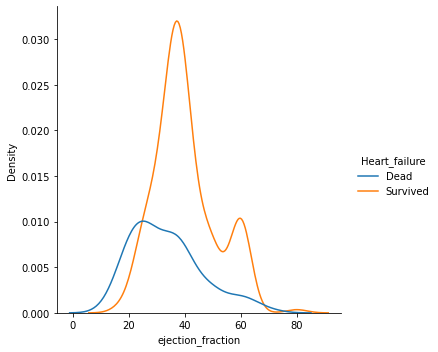

In [ ]:
import seaborn as sns
sns.displot(heart, x="ejection_fraction", hue="Heart_failure", kind="kde")

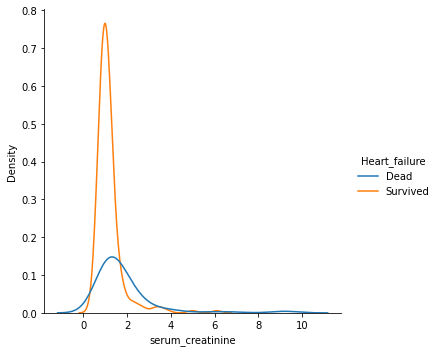

In [ ]:
sns.displot(heart, x="serum_creatinine", hue="Heart_failure", kind="kde")

##4.4 Distribution of Survived and Deceased patients according to physical characteristics

In [ ]:
import plotly.express as px
fig = px.sunburst(heart, path=['Heart_failure','Gender','Smokes'],color='Heart_failure',color_discrete_map={'Survived':'rgb(217,67,96)', 'Dead':'#c6e516'})
fig.show()

It is observed that more number of Males are prone to Heart Failure and number of patients who deceased due to this problem is larger in male category

And also it is observed that the smoking is not the significant feature for predicting Heart failure

# **Study-1 :** Classification with 3 most significant features

## 5. Classifiers (ML alg)

Selecting only the important features identified during feature selection for training classifier models

In [ ]:
X=heart[[x for x in feat]]

In [ ]:
oversample = SMOTE()
x_sample, y_sample = oversample.fit_resample(X, Y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.3, random_state=0)

In [ ]:
acc_list=[]
f1_list=[]

##5.1 Logistic Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from numpy import mean
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model_logreg = LogisticRegression()
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'penalty': ['l2'],
    'n_jobs': [-1]
}


grid_search = GridSearchCV(estimator = model_logreg,
                           param_grid = grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))



Best Parameters after tuning: {'C': 1.0, 'n_jobs': -1, 'penalty': 'l2'}
Best Accuracy after tuning: 0.7610365853658536


F1-score
0.7115449571032899
0.7131147540983606
0.7143357073167491


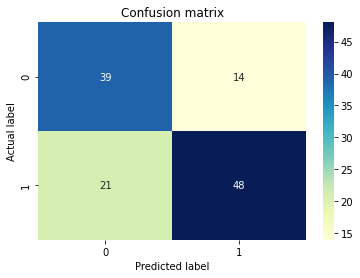

In [ ]:
model_logreg = LogisticRegression(C=1.0, n_jobs=-1,penalty='l2')
model_logreg.fit(X_train,y_train)
y_pred=model_logreg.predict(X_test)
# report performance
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('F1-score')
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

##5.2 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_nb = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator = model_nb,
                           param_grid = params_NB,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

Best Parameters after tuning: {'var_smoothing': 0.008111308307896872}
Best Accuracy after tuning: 0.7637195121951219


In [ ]:
results_NB = pd.DataFrame(grid_search.cv_results_['params'])
results_NB['test_score'] = grid_search.cv_results_['mean_test_score']

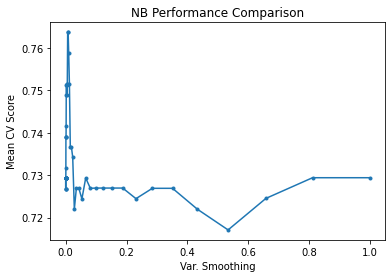

In [ ]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

It is observed that the best variance smoothing parameter for NB is 0.001, though the difference between other values in terms of the mean CV score is very small per the range of the y-axis.

F1-score
0.6754212429224367
0.680327868852459
0.6701875085970795


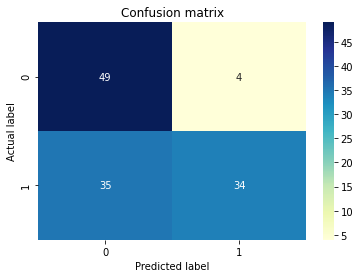

In [ ]:
model_nb.fit(X_train,y_train)
y_pred=model_nb.predict(X_test)
# report performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('F1-score')
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

## 5.3 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(random_state=1234)
params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}
grid_search = GridSearchCV(estimator = model_tree,
                           param_grid = params_DT,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

Best Parameters after tuning: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
Best Accuracy after tuning: 0.7782926829268293


F1-score
0.7480595314391512
0.7622950819672131
0.7559136282822198


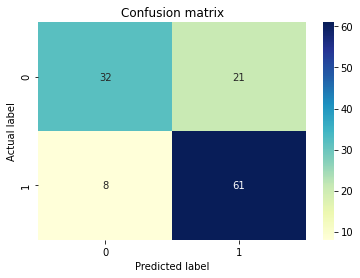

In [ ]:
model_tree=DecisionTreeClassifier(random_state=1234, criterion='entropy',max_depth=8,min_samples_split=3)
model_tree.fit(X_train,y_train)
y_pred=model_tree.predict(X_test)
# report performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('F1-score')
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

In [ ]:
model_tree = model_tree.fit(x_sample, y_sample)

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model_tree, out_file='tree_limited.dot', 
                                feature_names=['age','ejection_fraction','serum_creatinine'],  
                                class_names="DEATH_EVENT",
                                filled=True)




In [ ]:
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

##5.4 XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
scores = cross_val_score(model_xg, x_sample, y_sample, scoring='accuracy', cv=cv, n_jobs=-1)
f1_scores = cross_val_score(model_xg, x_sample, y_sample, scoring='f1', cv=cv, n_jobs=-1)
acc_list.append(mean(scores))
f1_list.append(mean(f1_scores))
# report performance
print('Accuracy: %.3f ' % (mean(scores)))
print('F1-score: %.3f ' % (mean(f1_scores)))

Accuracy: 0.781 
F1-score: 0.783 


##5.5 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}
grid_search = GridSearchCV(estimator = model_knn,
                           param_grid = params_KNN,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

Best Parameters after tuning: {'n_neighbors': 1, 'p': 2}
Best Accuracy after tuning: 0.7860365853658537


F1-score
0.7115449571032899
0.7131147540983606
0.7143357073167491


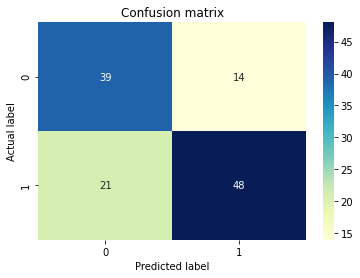

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=4,p=5)
model_knn.fit(X_train,y_train)
y_pred=model_knn.predict(X_test)
# report performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('F1-score')
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

##5.6 SVM

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
hyper = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'kernel':['rbf','linear']
        }
grid_search = GridSearchCV(estimator = model_svm,
                           param_grid = hyper,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

Best Parameters after tuning: {'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy after tuning: 0.7809756097560976


F1-score
0.7497949138638228
0.7540983606557377
0.7540983606557377


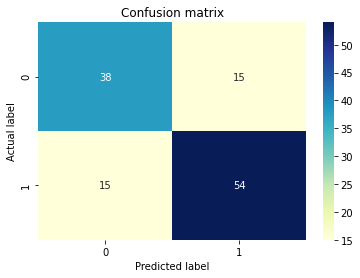

In [ ]:
model_svm = SVC(C=0.7,gamma=0.1, kernel='rbf')
model_svm.fit(X_train,y_train)
y_pred=model_svm.predict(X_test)
# report performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('F1-score')
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

##5.7 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'bootstrap': [True],
    'max_depth': [80],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100]
}
grid_search = GridSearchCV(estimator = model_rf,
                           param_grid = random_grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

In [ ]:
model_rf = RandomForestClassifier(max_depth=100, max_features=3,min_samples_leaf=3,min_samples_split=12, n_estimators=100)
model_rf.fit(X_train,y_train)
y_pred=model_rf.predict(X_test)
# report performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('F1-score')
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

##5.8 Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
scores = cross_val_score(model_ada, x_sample, y_sample, scoring='accuracy', cv=cv, n_jobs=-1)
f1_scores = cross_val_score(model_ada, x_sample, y_sample, scoring='f1', cv=cv, n_jobs=-1)
acc_list.append(mean(scores))
f1_list.append(mean(f1_scores))
# report performance
print('Accuracy: %.3f ' % (mean(scores)))
print('F1-score: %.3f ' % (mean(f1_scores)))

## 5.9 Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_boost = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
grid_search = GridSearchCV(estimator = model_boost,
                           param_grid = grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

In [ ]:
model_boost = BaggingClassifier(n_estimators=100)
model_boost.fit(X_train,y_train)
y_pred=model_boost.predict(X_test)
# report performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print('F1-score')
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))

# Deep Learning classifier

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
classifier = Sequential()
#add input layer and first hidden layer
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = "relu", input_dim = 3))

#add 2nd hidden layer
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = "relu"))
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = "sigmoid"))
classifier.compile(optimizer = "rmsprop", loss ="binary_crossentropy", metrics = ["accuracy"])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 25, epochs = 200,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32, 64],
              'epochs': [100, 200, 300],
              'optimizer': ['adam', 'rmsprop','adadelta']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train,verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

# Study-2: Using Time, Ejection Fraction and Serum_creatinine 

In [ ]:
feat=['time','ejection_fraction','serum_creatinine']
X=heart[[x for x in feat]]


In [ ]:
oversample = SMOTE()
x_sample, y_sample = oversample.fit_resample(X, Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.3, random_state=0)

## 6.1 Logistic Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from numpy import mean
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model_logreg = LogisticRegression()
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'penalty': ['l2'],
    'n_jobs': [-1]
}


grid_search = GridSearchCV(estimator = model_logreg,
                           param_grid = grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
grid_search.predict_proba

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))


## 6.2 Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_nb = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator = model_nb,
                           param_grid = params_NB,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

##6.3 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(random_state=1234)
params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}
grid_search = GridSearchCV(estimator = model_tree,
                           param_grid = params_DT,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

##6.4 XG Boost

In [ ]:
from xgboost import XGBClassifier
from numpy import mean
model_xg = XGBClassifier()
scores = cross_val_score(model_xg, x_sample, y_sample, scoring='accuracy', cv=cv, n_jobs=-1)
f1_scores = cross_val_score(model_xg, x_sample, y_sample, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f ' % (mean(scores)))
print('F1-score: %.3f ' % (mean(f1_scores)))

## 6.5 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}
grid_search = GridSearchCV(estimator = model_knn,
                           param_grid = params_KNN,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

##6.6 SVM

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
hyper = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'kernel':['rbf','linear']
        }
grid_search = GridSearchCV(estimator = model_svm,
                           param_grid = hyper,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

##6.7 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator = model_rf,
                           param_grid = random_grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

##6.8 AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
scores = cross_val_score(model_ada, x_sample, y_sample, scoring='accuracy', cv=cv, n_jobs=-1)
f1_scores = cross_val_score(model_ada, x_sample, y_sample, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f ' % (mean(scores)))
print('F1-score: %.3f ' % (mean(f1_scores)))

##6.9 Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_boost = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
grid_search = GridSearchCV(estimator = model_boost,
                           param_grid = grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

##6.10 ANN

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32, 64],
              'epochs': [100, 200, 300],
              'optimizer': ['adam', 'rmsprop','adadelta']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train,verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

# **Study-3 :** Classification with all features 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_sample_all, y_sample_all, test_size=0.3, random_state=0)

##7.1 Logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
model_logreg = LogisticRegression()
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'penalty': ['l2'],
    'n_jobs': [-1]
}


grid_search = GridSearchCV(estimator = model_logreg,
                           param_grid = grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample_all, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))


## 7.2 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_nb = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator = model_nb,
                           param_grid = params_NB,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample_all, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

##7.3 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(random_state=1234)
params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}
grid_search = GridSearchCV(estimator = model_tree,
                           param_grid = params_DT,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample_all, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

##7.4 XG Boost

In [ ]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
scores = cross_val_score(model_xg, x_sample_all, y_sample_all, scoring='accuracy', cv=cv, n_jobs=-1)
f1_scores = cross_val_score(model_xg, x_sample_all, y_sample_all, scoring='f1', cv=cv, n_jobs=-1)
acc_list.append(mean(scores))
f1_list.append(mean(f1_scores))
# report performance
print('Accuracy: %.3f ' % (mean(scores)))
print('F1-score: %.3f ' % (mean(f1_scores)))

##7.5 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}
grid_search = GridSearchCV(estimator = model_knn,
                           param_grid = params_KNN,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample_all, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

##7.6 SVM

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
hyper = {'C':[0.7],
         'gamma':[1.0],
         'kernel':['rbf','linear']
        }
grid_search = GridSearchCV(estimator = model_svm,
                           param_grid = hyper,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample_all, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

## 7.7 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

random_grid = {
    'bootstrap': [True],
    'max_depth': [90],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [300]
}
grid_search = GridSearchCV(estimator = model_rf,
                           param_grid = random_grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample_all, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

## 7.8 AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from numpy import mean
model_ada = AdaBoostClassifier()
scores = cross_val_score(model_ada, x_sample_all, y_sample_all, scoring='accuracy', cv=cv, n_jobs=-1)
f1_scores = cross_val_score(model_ada, x_sample_all, y_sample_all, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f ' % (mean(scores)))
print('F1-score: %.3f ' % (mean(f1_scores)))

##7.9 Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_boost = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
grid_search = GridSearchCV(estimator = model_boost,
                           param_grid = grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample_all, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_boost = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
grid_search = GridSearchCV(estimator = model_boost,
                           param_grid = grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(x_sample, y_sample)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

##7.10 ANN

In [ ]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32, 64],
              'epochs': [100, 200, 300],
              'optimizer': ['adam', 'rmsprop','adadelta']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train,verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


In [ ]:
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

# Study-4: Using PCA

In [ ]:
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X=new_heart.iloc[:,0:12]
heart_scale = StandardScaler().fit_transform(X)

In [ ]:
Y=new_heart['DEATH_EVENT']

In [ ]:
oversample = SMOTE()
x_sample_all, y_sample_all = oversample.fit_resample(X, Y)

In [ ]:
sklearn_pca = PCA(n_components = 5)
sklearn_transf = sklearn_pca.fit_transform(x_sample_all)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
  

grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'penalty': ['l2'],
    'n_jobs': [-1]
}


grid_search = GridSearchCV(estimator = log_reg,
                           param_grid = grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(sklearn_transf, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_nb = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator = model_nb,
                           param_grid = params_NB,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(sklearn_transf, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(random_state=1234)
params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}
grid_search = GridSearchCV(estimator = model_tree,
                           param_grid = params_DT,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(sklearn_transf, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

In [ ]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
scores = cross_val_score(model_xg, sklearn_transf, y_sample_all, scoring='accuracy', cv=cv, n_jobs=-1)
f1_scores = cross_val_score(model_xg,sklearn_transf, y_sample_all, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f ' % (mean(scores)))
print('F1-score: %.3f ' % (mean(f1_scores)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}
grid_search = GridSearchCV(estimator = model_knn,
                           param_grid = params_KNN,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(sklearn_transf, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
hyper = {'C':[0.5],
         'gamma':[0.5],
         'kernel':['rbf']
        }
grid_search = GridSearchCV(estimator = model_svm,
                           param_grid = hyper,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(sklearn_transf, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

random_grid = {
    'bootstrap': [True],
    'max_depth': [90],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [300]
}
grid_search = GridSearchCV(estimator = model_rf,
                           param_grid = random_grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(sklearn_transf, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
scores = cross_val_score(model_ada, sklearn_transf, y_sample_all, scoring='accuracy', cv=cv, n_jobs=-1)
f1_scores = cross_val_score(model_ada, sklearn_transf, y_sample_all, scoring='f1', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f ' % (mean(scores)))
print('F1-score: %.3f ' % (mean(f1_scores)))

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_boost = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
grid_search = GridSearchCV(estimator = model_boost,
                           param_grid = grid,
                           scoring = 'accuracy',
                           cv = cv)
grid_search = grid_search.fit(sklearn_transf, y_sample_all)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32, 64],
              'epochs': [100, 200, 300],
              'optimizer': ['adam', 'rmsprop','adadelta']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(sklearn_transf, y_sample_all,verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))

# Result

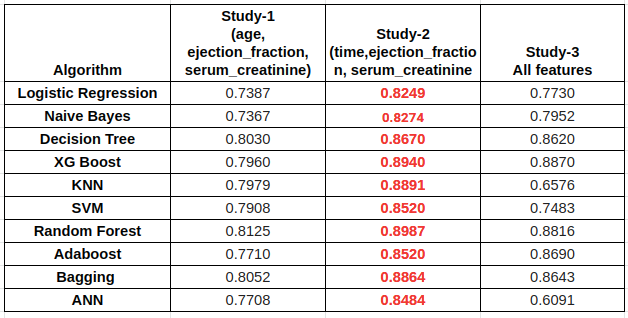

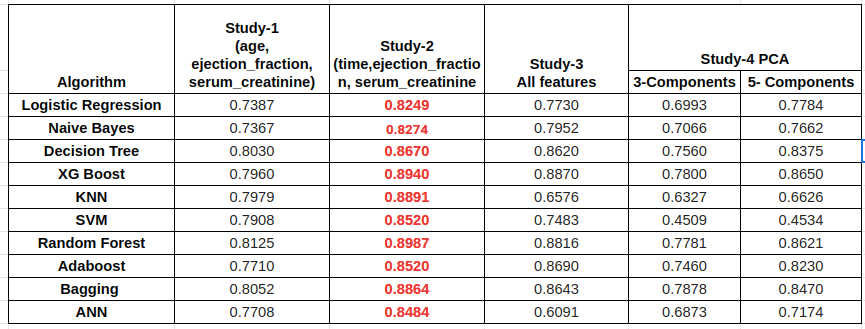

It is observed that
1. ML algorithms gives better accuracy in Study-2 where the features Follow-up time, Ejection fraction and serum creatinine are considered
2. Study-1 where Age, Ejection fraction and serum creatinine are considered, the accuracy is comparitively low when compared to Study-2 and Study-3 
3. From this Study it can be concluded that Age is not a significant feature for heart failure.